<a href="https://colab.research.google.com/github/PriyankaPVibhandik/Federated-Learning-based-Perception-of-IDC-in-Histopathological-images-with-the-use-of-Deep-Learning/blob/main/FinalMobilenetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MobileNet-V2 image classification DL module.

# import libraries

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from keras.models import Sequential

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import tensorflow
import keras

In [ ]:
import json
import math
import os  # dealing with directories

import cv2 # working with, mainly resizing, images
from PIL import Image
import numpy as np  # dealing with arrays
from keras import layers
from keras.applications import DenseNet201
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
from tqdm import tqdm   # a nice pretty percentage bar for tasks.
import tensorflow as tf
from keras import backend as K
import gc
from functools import partial
from sklearn import metrics
from collections import Counter
import json
import itertools
%matplotlib inline

In [ ]:
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imutils import paths

# upload the dataset folder

In [ ]:
from zipfile import ZipFile
file_name = '/content/FinalProjectDataset.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


this code snippet reads and processes images from a directory, resizes them to a specific dimension, converts them into NumPy arrays, extracts their labels from the image paths, and normalizes the pixel values. The resulting processed image data and labels are stored in separate NumPy arrays.

In [ ]:
imagePaths = sorted(list(paths.list_images("/content/FinalProjectDataset")))

# random shuffle
random.seed(42)
random.shuffle(imagePaths)

data = []
labels = []
image_dims = (224, 224, 3)

for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (image_dims[1], image_dims[0]))
    image = img_to_array(image)
    data.append(image)
    l = label = imagePath.split(os.path.sep)[-2].split("_")
    labels.append(l)

data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
print("{} images ({:.2f}MB)".format(len(imagePaths), data.nbytes / (1024 * 1000.0)))

1680 images (1975.68MB)


In [ ]:
data = np.array(data)
label = np.array(labels)
print(data.shape)

(1680, 224, 224, 3)


In [ ]:
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(labels)
# total 4 labels
print("class labels:")
for (i, label) in enumerate(mlb.classes_):
    print("{}. {}".format(i + 1, label))

class labels:
1. Begnin
2. Maglinant


the MobileNetV2_model function creates a custom model based on the MobileNetV2 architecture. It adds the MobileNetV2 layers, performs pooling and flattening, adds fully connected layers with dropout regularization, and concludes with a softmax layer for multi-class classification. The function also freezes the weights of all layers except the last four layers of MobileNetV2.

In [ ]:
def MobileNetV2_model(learning_rate, input_shape,class_number):
    baseModel = MobileNetV2(include_top=False, input_tensor=Input(shape=input_shape))
    for layer in baseModel.layers[:-4]:
        layer.trainable = False

    model = Sequential()
    model.add(baseModel)
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(class_number, activation='softmax'))

    return model

In [ ]:
bs = 32
lr = 0.0001
size = (224, 224)
shape = (224,224, 3)
epochs = 10
class_number = 2

the model.compile() function configures the learning process of the model. It specifies the loss function, evaluation metric(s), and optimization algorithm to be used during training.
"Adam" is an adaptive learning rate optimization algorithm that is commonly used in deep learning. It adjusts the learning rate dynamically based on the gradients of the model parameters, allowing faster convergence and better performance.

Categorical cross-entropy is a commonly used loss function for multi-class classification tasks. It measures the dissimilarity between the predicted class probabilities and the true class labels.
model.compile() is a method used in Keras to configure the learning process of a model. It is called to compile the model before training.

In [ ]:
model = MobileNetV2_model(lr,shape,class_number)
model.compile(loss= "categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
image_shape = (224,224,3)

 this code snippet creates a base MobileNetV2 model without the top classification layers and initializes it with pre-trained weights from the ImageNet dataset. The input_shape parameter is used to specify the shape of the input images that will be processed by the model

In [ ]:
import tensorflow as tf
base_model = tf.keras.applications.MobileNetV2(input_shape=image_shape,
                                               include_top=False,
                                               weights='imagenet')

model = MobileNetV2_model(lr,shape,class_number)
model.compile(loss= "categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [ ]:
trainX, testX, trainY, testY = train_test_split(data, labels, test_size=0.20)

this code snippet splits the training data into training and validation sets. The size of the validation set is set to 20% of the entire dataset, and a random seed of 11 is used to ensure reproducibility of the split.

In [ ]:
trainX, x_val, trainY, y_val = train_test_split(
   trainX, trainY,
    test_size=0.20,
    random_state=11
)

In [ ]:
print("[INFO] training ...")
H = model.fit(trainX, trainY, batch_size=32,steps_per_epoch=len(trainX) // 32,	validation_data=(testX, testY),	validation_steps=len(testX) // 32,	epochs=20)

[INFO] training ...
Epoch 1/20
33/33 [==============================] - 93s 3s/step - loss: 1.3954 - accuracy: 0.7784 - val_loss: 0.3746 - val_accuracy: 0.8438
Epoch 2/20
33/33 [==============================] - 92s 3s/step - loss: 0.5799 - accuracy: 0.8332 - val_loss: 0.3385 - val_accuracy: 0.8625
Epoch 3/20
33/33 [==============================] - 68s 2s/step - loss: 0.3897 - accuracy: 0.8744 - val_loss: 0.3314 - val_accuracy: 0.9000
Epoch 4/20
33/33 [==============================] - 69s 2s/step - loss: 0.2747 - accuracy: 0.8945 - val_loss: 0.2603 - val_accuracy: 0.8938
Epoch 5/20
33/33 [==============================] - 61s 2s/step - loss: 0.2039 - accuracy: 0.9386 - val_loss: 0.2930 - val_accuracy: 0.8813
Epoch 6/20
33/33 [==============================] - 62s 2s/step - loss: 0.1823 - accuracy: 0.9501 - val_loss: 0.3427 - val_accuracy: 0.9094
Epoch 7/20
33/33 [==============================] - 60s 2s/step - loss: 0.1204 - accuracy: 0.9578 - val_loss: 0.5524 - val_accuracy: 0.8562


precision measures the accuracy of positive predictions, recall measures the ability to identify positive instances, and the F1 score provides a balanced measure of a model's precision and recall. These metrics are commonly used in classification tasks to evaluate the performance of machine learning models.

In [ ]:
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=32)

# for each image in the testing set we need to find the index of the label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,target_names=mlb.classes_))

[INFO] evaluating network...
11/11 [==============================] - 14s 1s/step
              precision    recall  f1-score   support

      Begnin       0.87      0.99      0.93       230
   Maglinant       0.97      0.68      0.80       106

    accuracy                           0.89       336
   macro avg       0.92      0.84      0.86       336
weighted avg       0.90      0.89      0.89       336



the build_model function builds a classification model based on the given backbone architecture. It adds the backbone layers, performs global average pooling, applies dropout and batch normalization, adds a final dense layer with softmax activation for classification, and compiles the model with the specified loss function, optimizer, and metrics.

In [ ]:
def build_model(backbone, lr=1e-4):
    model = Sequential()
    model.add(backbone)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(2, activation='softmax'))


    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(lr=lr),
        metrics=['accuracy']
    )

    return model

the ReduceLROnPlateau callback reduces the learning rate during training if the validation accuracy does not improve for a certain number of epochs. The ModelCheckpoint callback saves the weights of the model at each improvement in the validation accuracy, ensuring that only the best weights are saved. These callbacks help in optimizing the learning rate and saving the best model weights for later use.

In [ ]:
# Learning Rate Reducer
learn_control = ReduceLROnPlateau(monitor='val_acc', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)

# Checkpoint
filepath="weights.best.hdf5"
metric = 'val_accuracy'
checkpoint = ModelCheckpoint(filepath, monitor=metric, verbose=1, save_best_only=True, mode='max')  #monitor='val_acc'

In [ ]:
Y_val_pred = model.predict(x_val)

9/9 [==============================] - 12s 1s/step


In [ ]:
accuracy_score(np.argmax(y_val, axis=1), np.argmax(Y_val_pred, axis=1))

0.9070631970260223

In [ ]:
Y_pred = model.predict(testX)

11/11 [==============================] - 14s 1s/step


this code snippet sets the batch size to 32 and configures an ImageDataGenerator with augmentation options such as zooming, rotation, and flipping. This generator will be used to generate augmented image data during training.

In [ ]:
bs = 32

# Using original generator
train_generator = ImageDataGenerator(
        zoom_range=2,  # set range for random zoom
        rotation_range = 90,
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,  # randomly flip images
    )

this code snippet performs Test Time Augmentation (TTA) by generating multiple predictions with augmented versions of the test data. The predictions from each TTA step are stored and then averaged to obtain the final predictions. This technique can help improve the performance and robustness of the model's predictions.

In [ ]:
tta_steps = 10
predictions = []

for i in tqdm(range(tta_steps)):
    preds = model.predict_generator(train_generator.flow(testX, batch_size=bs, shuffle=False),
                                    steps = len(testX)/bs)

    predictions.append(preds)
    gc.collect()

Y_pred_tta = np.mean(predictions, axis=0)

  0%|          | 0/10 [00:00<?, ?it/s]<ipython-input-24-74e30d10b54e>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(train_generator.flow(testX, batch_size=bs, shuffle=False),
100%|██████████| 10/10 [03:51<00:00, 23.12s/it]


this code snippet defines a function to plot a confusion matrix and then uses it to plot a confusion matrix for skin cancer classification. The confusion matrix provides insights into the performance of a classification model by showing the counts or proportions of true positive, true negative, false positive, and false negative predictions for each class.

Confusion matrix, without normalization
[[228   2]
 [ 34  72]]


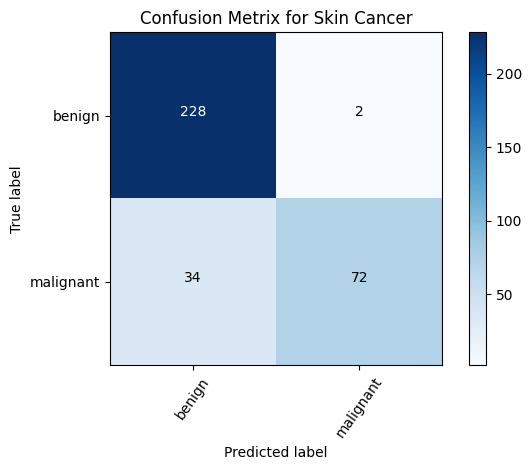

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=55)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(np.argmax(testY, axis=1), np.argmax(Y_pred, axis=1))

cm_plot_label =['benign', 'malignant']
plot_confusion_matrix(cm, cm_plot_label, title ='Confusion Metrix for Skin Cancer')

Confusion matrix, without normalization
[[226   4]
 [ 63  43]]


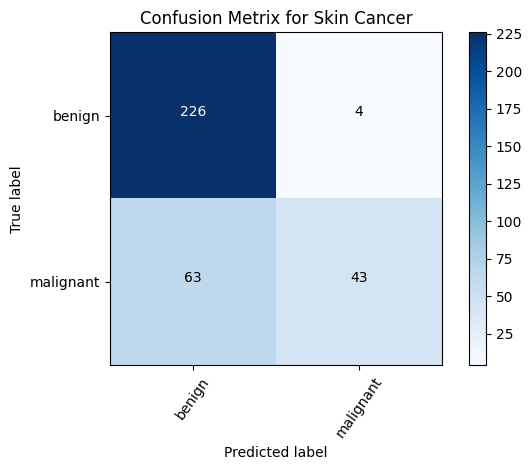

In [ ]:
cm = confusion_matrix(np.argmax(testY, axis=1), np.argmax(Y_pred_tta, axis=1))

cm_plot_label =['benign', 'malignant']
plot_confusion_matrix(cm, cm_plot_label, title ='Confusion Metrix for Skin Cancer')

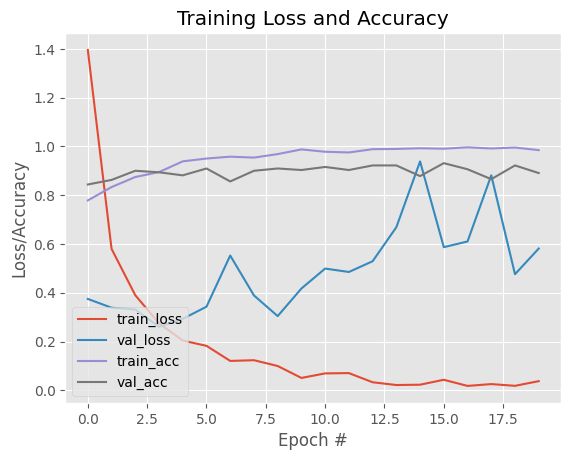

In [ ]:
N = 20
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

the accuracy of this model is 89%

About mobilenet-v2

MobileNetV2 is a convolutional neural network architecture that was designed for efficient and lightweight image classification tasks. It is an extension of the original MobileNet architecture, aiming to improve the trade-off between accuracy and model size.

Key features of MobileNetV2:

1. Depthwise Separable Convolutions: MobileNetV2 utilizes depthwise separable convolutions, which split the standard convolution operation into two separate operations: a depthwise convolution and a pointwise convolution. This significantly reduces the computational cost while maintaining the representational capacity of the network.

2. Inverted Residuals: MobileNetV2 introduces inverted residuals, which use a bottleneck architecture with shortcut connections. This structure allows for information flow between different layers while reducing the number of parameters.

3. Linear Bottlenecks: MobileNetV2 employs linear bottlenecks with a narrow bottleneck layer followed by a linear activation function. This choice reduces the non-linearity of the bottleneck layer, enabling better information flow and preserving valuable spatial information.

4. Width Multiplier and Resolution Multiplier: MobileNetV2 provides flexibility through the use of width and resolution multipliers. The width multiplier adjusts the number of channels in each layer, allowing for control over the model's size and computational requirements. The resolution multiplier scales the input image resolution, which can further reduce the model's size and computational cost.

Overall, MobileNetV2 is designed to be efficient, lightweight, and suitable for resource-constrained environments, such as mobile devices or embedded systems. It strikes a balance between model size and accuracy, making it well-suited for various image classification tasks with limited computational resources.

MobileNetV2 has several parameters that can be adjusted to control the model's size, computational cost, and performance. Here are the key parameters:

1. Input Shape: MobileNetV2 accepts input images of a specific shape. The input shape is typically specified as a tuple representing the image dimensions, such as (224, 224, 3), where 224x224 is the image size and 3 corresponds to the number of color channels (RGB).

2. Width Multiplier: The width multiplier is a scaling factor applied to the number of channels in each layer. It is a value between 0 and 1, where 1 represents the original number of channels and smaller values reduce the number of channels proportionally. The width multiplier allows trading off between model size and accuracy.

3. Resolution Multiplier: The resolution multiplier scales the input image resolution. It is also a value between 0 and 1, where 1 represents the original resolution. Scaling down the resolution reduces the computational cost and model size, but may also affect the model's performance.

4. Depth Multiplier: The depth multiplier is a parameter that controls the number of filters in the depthwise convolution operation. It is a value between 0 and 1, where 1 represents the original number of filters. Similar to the width multiplier, the depth multiplier affects the model size and computational cost.

5. Number of Classes: The number of classes represents the output size of the final dense layer in the network. It should be set according to the specific classification task.

Regarding the space consumption and execution time of MobileNetV2, these factors depend on the specific configuration of the model, such as the input shape, width multiplier, and resolution multiplier. Generally, MobileNetV2 is known for its compact size and computational efficiency compared to larger and more complex architectures like VGG or ResNet. By reducing the number of parameters and employing depthwise separable convolutions, MobileNetV2 achieves a good balance between model size and performance.

The exact space consumption and execution time can vary depending on the hardware platform, optimizations, and framework used for implementation. However, compared to deeper and more parameter-heavy models, MobileNetV2 generally requires less memory and computational resources, making it suitable for deployment on resource-constrained devices, including mobile phones, edge devices, and embedded systems.